In [1]:
import torch

In [2]:
ckpt_kit = torch.load('git_clone/T2M-GPT/output/VQVAE_kit/net_best_fid_pretrain.pth', map_location='cpu')
codebook_kit = ckpt_kit['net']['vqvae.quantizer.codebook']
print('------------------------------------- Codebook_KIT -------------------------------------')
print('\n',codebook_kit, '\n')
print(codebook_kit.shape)
print('-----------------------------------------------------------------------------------------\n\n')
ckpt_humanml = torch.load('git_clone/T2M-GPT/output/VQVAE/net_best_fid_pretrain.pth', map_location='cpu')
codebook_humanml = ckpt_humanml['net']['vqvae.quantizer.codebook']
print('---------------------------------- Codebook_HumanML3D ----------------------------------')
print('\n',codebook_humanml, '\n')
print(codebook_humanml.shape)
print('-----------------------------------------------------------------------------------------\n\n')

------------------------------------- Codebook_KIT -------------------------------------

 tensor([[ 1.2788,  0.7047, -0.0526,  ..., -0.1578,  2.3753,  1.1482],
        [ 0.1483,  4.3592,  3.0455,  ...,  0.5980, -5.8417, -2.4059],
        [-2.1413, -0.3750, -2.9218,  ..., -0.0105, -2.6452,  0.6532],
        ...,
        [ 0.1417,  2.2339, -1.8164,  ..., -2.9157,  2.0044, -0.6128],
        [ 1.4058,  1.8730,  3.2300,  ...,  1.0657, -1.4700,  0.5515],
        [-0.3201, -0.7897, -3.0091,  ..., -1.2063, -2.0032,  1.1831]]) 

torch.Size([512, 512])
-----------------------------------------------------------------------------------------


---------------------------------- Codebook_HumanML3D ----------------------------------

 tensor([[  4.0890,   1.4359,   1.2731,  ...,  -5.1736,  -7.5866,   0.9106],
        [ -6.5860,   1.2391,   4.4991,  ...,   4.0101, -10.4006,   7.5440],
        [ -3.4245,   4.9095,  -2.1274,  ...,  -1.1140,  -5.9388, -17.2906],
        ...,
        [  4.9630,  -4.920

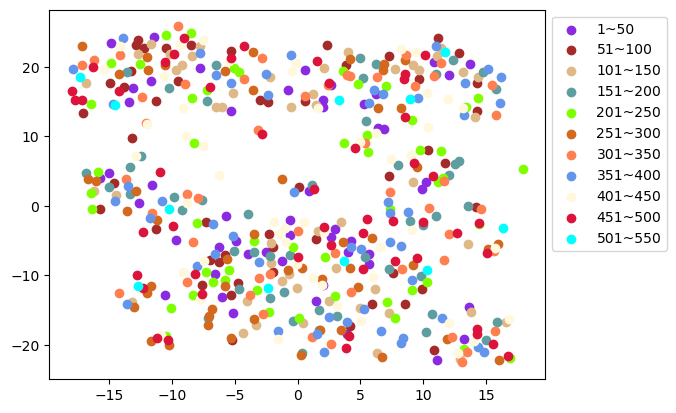

In [9]:
# KIT-ML 데이터셋으로 학습한 VQ-VAE의 Codebook에 대해 t-sne 적용 #

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

color_list = []
for k, v in mcolors.CSS4_COLORS.items():
    color_list.append(k)

n_components = 2
model = TSNE(n_components=n_components)

x, y = model.fit_transform(codebook_kit)[:, 0], model.fit_transform(codebook_kit)[:, 1]

color_idx = 10
color = color_list[color_idx]
label = '1~50'
plt.scatter(x[0], y[0], label=label, color = color)
for i in range(1,512):
    
    if ((i-1) % 50) == 0 and i != 1: # 우선은 512개의 codebook에 대해, 인덱스를 기준으로 50개씩 잘라서 color를 변경
        color_idx += 1
        color = color_list[color_idx]
        label = f'{i}~{i+49}' 
        plt.scatter(x[i], y[i], label=label, color = color)
    else:
        plt.scatter(x[i], y[i], color = color)
        
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.0))

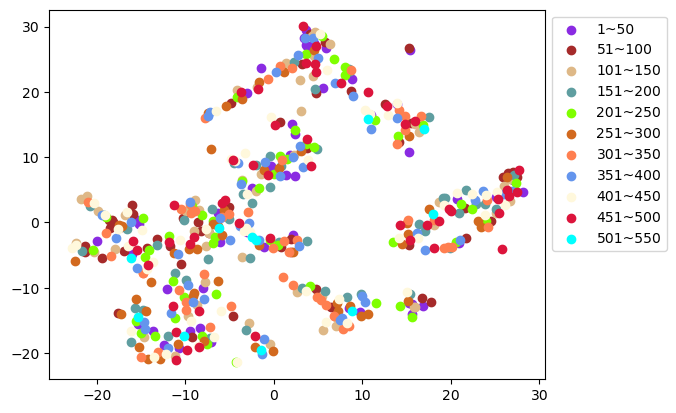

In [4]:
# HumanML3D 데이터셋으로 학습한 VQ-VAE의 Codebook에 대해 t-sne 적용 #

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

color_list = []
for k, v in mcolors.CSS4_COLORS.items():
    color_list.append(k)

n_components = 2
model = TSNE(n_components=n_components)

x, y = model.fit_transform(codebook_humanml)[:, 0], model.fit_transform(codebook_humanml)[:, 1]

color_idx = 10
color = color_list[color_idx]
label = '1~50'
plt.scatter(x[0], y[0], label=label, color = color)
for i in range(1,512):
    
    if ((i-1) % 50) == 0 and i != 1: # 우선은 512개의 codebook에 대해, 인덱스를 기준으로 50개씩 잘라서 color를 변경
        color_idx += 1
        color = color_list[color_idx]
        label = f'{i}~{i+49}' 
        plt.scatter(x[i], y[i], label=label, color = color)
    else:
        plt.scatter(x[i], y[i], color = color)
        
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.0))

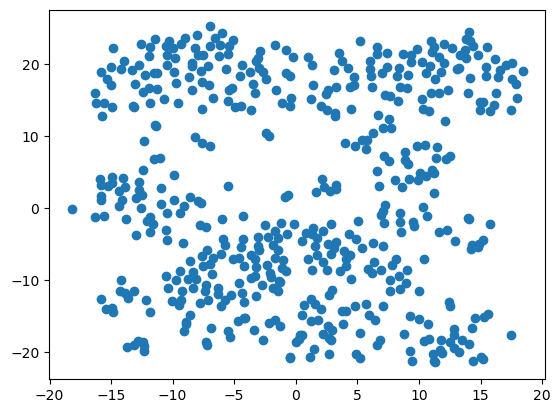

In [12]:
x, y = model.fit_transform(codebook_kit)[:, 0], model.fit_transform(codebook_kit)[:, 1]
plt.scatter(x, y)

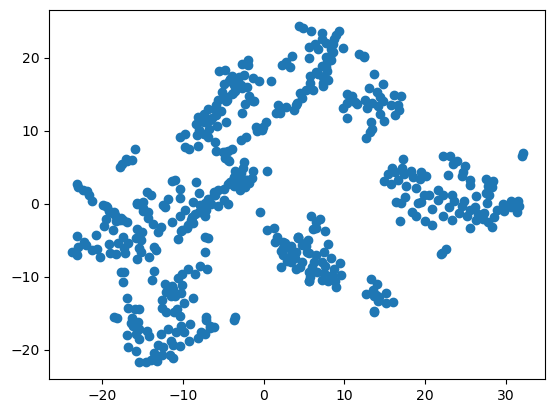

In [10]:
x, y = model.fit_transform(codebook_humanml)[:, 0], model.fit_transform(codebook_humanml)[:, 1]
plt.scatter(x, y)

In [ ]:
# KIT-ML 데이터셋으로 학습한 VQ-VAE의 Codebook에 대해 t-sne 적용 #

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

color_list = []
for k, v in mcolors.CSS4_COLORS.items():
    color_list.append(k)

n_components = 2
model = TSNE(n_components=n_components)

x, y = model.fit_transform(codebook_kit)[:, 0], model.fit_transform(codebook_kit)[:, 1]

color_idx = 10
color = color_list[color_idx]
label = '1~50'
plt.scatter(x[0], y[0], label=label, color = color)
for i in range(1,512):
    
    if ((i-1) % 50) == 0 and i != 1: # 우선은 512개의 codebook에 대해, 인덱스를 기준으로 50개씩 잘라서 color를 변경
        color_idx += 1
        color = color_list[color_idx]
        label = f'{i}~{i+49}' 
        plt.scatter(x[i], y[i], label=label, color = color)
    else:
        plt.scatter(x[i], y[i], color = color)
        
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.0))